## NLP Modeling

#### Business Problem: Predicting Tweet sentiment based on Tweet content.

#### Stakeholder: Small tech company wanting to gain insight into consumer feelings on various company products. 

## Data Understanding
 * 9093 rows - 3 columns. Data comes from CrowdFlower via data.world. Human raters rated the sentiment in over 9,000 Tweets as positive, negative, neither or "can't tell".



In [104]:
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string
import re
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [94]:
import pandas as pd
df = pd.read_excel('tweets.xlsx')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [95]:
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [96]:
df.emotion_in_tweet_is_directed_at.isna().sum()

5802

In [97]:
df.emotion_in_tweet_is_directed_at.fillna('Unknown', inplace=True)
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",Unknown,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",Unknown,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,Unknown,No emotion toward brand or product


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     9093 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [99]:
df[df['tweet_text'].isna()]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,Unknown,No emotion toward brand or product


In [100]:
df.dropna(subset=['tweet_text'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     9092 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [101]:
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion'}, inplace=True)

In [102]:
df.rename(columns={'emotion_in_tweet_is_directed_at': 'Directed At'}, inplace=True)

In [103]:
df['Directed At'].value_counts()

Unknown                            5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: Directed At, dtype: int64

In [105]:
df = df.drop(df[df['Emotion'] == "I can't tell"].index)

In [106]:
df_2 = df.drop(df[df['Emotion'] == "No emotion toward brand or product"].index)
df_2

,tweet_text,Directed At,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [108]:
#0 negative, 1 positive
le = LabelEncoder()
df_2['Emotion'] = le.fit_transform(df_2['Emotion'])

In [109]:
df_2.Emotion.value_counts()

1    2978
0     570
Name: Emotion, dtype: int64

In [110]:
df_2

,tweet_text,Directed At,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,1
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,1
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,0
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,1


In [111]:
X = df_2.tweet_text
y = df_2.Emotion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [112]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_test

,tweet_text
685,New Post: iPad 2 Launches to Huge Lines at App...
6393,RT @mention NYT app for iPad: not &quot;here's...
7851,Steve Jobs doesn't position the iPhone as a de...
5813,RT @mention Google Circles will be toast if it...
2944,Thanks @mention for giving me new top cover fo...
...,...
2657,Got in the Google party not before being inter...
14,Great #sxsw ipad app from @madebymany: http://...
233,"If iPhone alarms botch the timechange, how man..."
3929,keep up with new on #Japan quake from iPhone a...


In [113]:
df_2.Emotion.value_counts()

1    2978
0     570
Name: Emotion, dtype: int64

In [114]:
sw = stopwords.words('english')

In [115]:
# #NLP lecture modeling notebook
# def get_pos(treebank_tag):
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

In [116]:
# #NLP lecture modeling notebook - basic token pattern from cumulative NLP lab

# def tweet_preparer(tweet, stopwords=sw):
#     regex_token = RegexpTokenizer(r"(?u)\b\w\w+\b")
#     tweet = regex_token.tokenize(tweet)
#     tweet = [word.lower() for word in tweet]
#     tweet = [word for word in tweet if word not in sw]
#     print(tweet)
#     tweet = pos_tag(tweet)
#     tweet = [(word[0], get_pos(word[1])) for word in tweet]
#     lemmatizer = WordNetLemmatizer() 
#     tweet = [lemmatizer.lemmatize(word[0], word[1]) for word in tweet]
#     return ' '.join(tweet)

In [117]:
#method for modeling lecture notebook - countvectorizer
# tweets = [tweet_preparer(doc, sw) for doc in X_train['tweet_text']]

['giving', 'away', 'ipad', 'boxes', 'books', 'mention', 'sxsw', 'techenvy']
['setting', 'ipad2', 'swift', 'upbeat', 'service', 'morning', 'sxsw', 'apple', 'pop', 'store']
['third', 'time', 'charm', 'gt', 'gt', 'gt', 'google', 'launch', 'new', 'social', 'network', 'sxsw', 'cnet', 'news', 'link']
['mention', 'used', 'think', 'started', 'making', 'great', 'apps', 'official', 'sxsw', 'app', 'ipad', 'blows', 'versions', 'site', 'away']
['hopefully', 'best', 'thing', 'comes', 'sxsw', 'fact', 'people', 'flew', 'austin', 'pick', 'ipad']
['among', 'things', 'missing', 'sxsw', 'google', 'aclu', '80', 'dance', 'party']
['biggest', 'frustration', 'sxsw', 'far', 'one', 'looks', 'going', 'glued', 'iphone']
['expect', 'lots', 'buzz', 'ipad', 'sxsw', 'since', 'comes', 'tomorrow', 'support', 'flash', 'maybe', 'link', 'elonsxsw']
['queue', 'apple', 'pop', 'store', 'sxsw', 'still', 'long']
['way', 'call', 'ipad', 'count', 'sxsw', 'reasonable', 'think', 'one', 'every', 'people']
['apple', 'employee', 'psy

['cool', 'apple', 'opening', 'temporary', 'store', 'ipad2', 'launch', 'sxsw', 'link']
['freaking', 'everyone', 'ipad', 'iphone', 'mac', 'wow', 'sxsw']
['google', 'launch', 'new', 'social', 'network', 'circles', 'linking', 'closely', 'peeps', 'connect', 'possibly', 'today', 'mention', 'sxsw']
['booyah', 'rt', 'mention', 'lt', 'guess', 'ipad', 'unsix', 'tweetup', 'thanks', 'mention', 'amp', 'mention', 'sxsw', 'happydance']
['iphone', 'ipad', 'mac', 'oh', 'agchat', 'sxsw']
['sxsw', 'movie', 'stars', 'moody', 'directors', 'well', 'fine', 'guy', 'really', 'attracting', 'crowd', 'one', 'showing', 'ipad']
['google', 'honors', 'users', 'privacy', 'letting', 'see', 'info', 'system', 'allowing', 'delete', 'marissagoogle', 'sxsw']
['rt', 'mention', 'sxsw', 'look', 'blue', 'hair', 'got', 'free', 'android', 'phone', 'info', 'stickers', 'mention', 'allhat3']
['rt', 'mention', 'win', 'awesome', 'ipad', 'quibids', 'custom', 'mention', 'case', 'catch', 'sxsw', 'wearing', 'openbeta', 'vip', 'badge']
['f

['waited', 'line', 'apple', 'product', 'missing', 'important', 'rite', 'passage', 'sxsw']
['mention', 'new', 'features', 'google', 'maps', 'ex', 'ability', 'see', 'inside', 'amazing', 'museums', 'able', 'zoom', 'brushstroke', 'sxsw', 'loveher']
['watched', 'quot', 'ipad', 'design', 'headaches', 'quot', 'sxsw', 'buttons', 'hack', 'tapworthy']
['google', 'crisis', 'response', 'site', 'good', 'info', 'japanese', 'earthquake', 'tsunami', 'link', 'sxsw', 'sxswi']
['got', 'many', 'cool', 'things', 'sxsw', 'headsets', 'usb', 'drives', 'iphone', 'chargers', 'galore', 'earphones', 'must', '1k', 'products', 'rad']
['even', 'begins', 'apple', 'wins', 'sxsw', 'techcrunch', 'link', 'sxsw']
['every', 'dj', 'sxsw', 'spins', 'ipad', 'part', 'arsenal', 'future', 'coming', 'wait']
['photo', 'saving', 'ipad', 'sxsw', 'style', 'hpsxsw', 'taken', 'instagram', 'link']
['giving', 'away', 'ipad', 'panel', 'wish', 'luck', 'sxsw']
['rt', 'mention', 'apple', 'store', 'line', 'block', 'week', 'long', 'sxsw', 'ama

['loving', 'hello', 'holler', 'gram', 'ipad', 'link', 'via', 'mention', 'sxsw']
['rt', 'mention', 'good', 'news', 'austin', 'eats', 'bbq', 'iphone', 'available', 'link', 'itunes', 'austin', 'bbq', 'sxsw', 'sxswi', 'via', 'mention']
['rt', 'mention', 'marissa', 'mayer', 'google', 'connect', 'digital', 'amp', 'physical', 'worlds', 'mobile', 'link', 'sxsw']
['smart', 'company', 'apple', 'set', 'open', 'pop', 'shop', 'core', 'sxsw', 'action', 'link', 'apple']
['mention', 'good', 'question', 'amp', 'brands', 'answer', 'probably', 'except', 'apple', 'course', 'maybe', 'netflix', 'sxsw']
['love', 'waves', 'link', 'ipad', 'webber', 'japan', 'sxsw']
['score', 'rt', 'mention', 'google', 'handing', 'free', 'pi', 'pi', 'day', 'sxsw', 'win']
['google', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', 'google', 'circles', 'sxsw', 'link']
['rt', 'mention', 'sxsw', 'apple', 'store', 'tonight', 'handing', 'stickers', 'amp', 'coupons', 'mention', 'dodo', 'cases', 'ipad2']
['sxsw', 'go

['hey', 'mention', 'cool', 'iphone', 'cases', 'zazzlesxsw', 'sxsw', 'sxswi', 'fastcompanygrill', 'link']
['livetapp', 'raffling', 'ipad', 'sxsw', 'check', 'tweet', 'sxsw', 'show', 'entered', 'win', 'music', 'rewards']
['sweet', 'got', 'ipad', 'nerd', 'joke', 'sxsw']
['day', 'one', 'sxsw', 'coming', 'close', 'lots', 'good', 'stuff', 'looking', 'fwd', 'tomorrow', 'coolest', 'far', 'google', 'location', 'map', 'plans', 'features']
['google', 'launch', 'new', 'social', 'network', 'sxsw', 'cnet', 'news', 'link', 'sxsw']
['apple', 'popupstore', 'sxsw', 'get', 'ipad', '0310apple', 'link']
['rt', 'mention', 'true', 'rt', 'mention', 'rumor', 'apple', 'opening', 'temporary', 'store', 'downtown', 'austin', 'sxsw', 'amp', 'ipad', 'launch', 'link']
['sxsw', 'rt', 'mention', 'wow', 'apple', 'right', 'thing', 'japan', 'must', 'read', 'link']
['like', 'said', 'peeps', 'taking', 'pictures', 'ipad', 'looking', 'ridculous', 'still', 'want', 'one', 'sxsw', 'link']
['3g', 'sketchy', 'austin', 'sxsw', 'yet'

['interested', 'hear', 'different', 'google', 'buzz', 'rt', 'mention', 'get', 'ready', 'word', 'quot', 'circles', 'quot', 'trending', 'sxswi', 'sxsw']
['mention', 'apple', 'great', 'example', 'retail', 'store', 'layed', 'future', 'registers', 'checkout', 'line', 'sxsw']
['mention', 'good', 'job', 'mention', 'sxsw', 'went', 'home', 'amp', 'watched', 'season', 'guild', 'sucks', 'tweet', 'abt', 'iphone', 'hijack', 'top', 'tweet', 'lol']
['perfect', 'attention', 'detail', 'rt', 'mention', 'google', 'recreated', 'code', 'pac', 'man', 'doodle', 'original', 'bugs', 'included', 'sxsw', 'googledoodles']
['mention', 'saw', 'lax', 'heading', 'sxsw', 'wife', 'iphone', 'ipad', 'download', 'app', 'freespeech', 'mention']
['google', 'saving', 'drivers', 'time', 'fuel', 'link', 'seo', 'sem', 'googlemaps', 'mobile', 'topnews', 'sxsw']
['rt', 'mention', 'come', 'party', 'mention', 'amp', 'google', 'tonight', 'sxsw', 'link', 'bands', 'food', 'art', 'interactive', 'maps']
['ipad', 'design', 'panel', 'good

['excited', 'sxsw', 'tomorrow', 'leaving', 'austin', '8am', 'see', 'google', 'mention', '30pm', 'still', 'working', 'schedule']
['bought', 'ipad', 'impulse', 'must', 'something', 'water', 'sxsw']
['rt', 'mention', 'mindjet', 'going', 'sxsw', 'celebrate', 'giving', 'away', 'ipad', 'find', 'enter', 'link']
['rt', 'mention', 'launched', 'ipad', 'app', 'sxsw', 'get', 'details', 'first', 'edition', 'free', 'link']
['ipad', 'session', 'full', 'loved', 'energy', 'formation', 'hyatt', 'hall', 'way', 'overflow', 'session', 'rebeltv', 'sxsw']
['anybody', 'know', 'whether', 'nab', 'white', '3g', '64gb', 'ipad2', 'austin', 'sxsw', 'apple', 'popupstore']
['go', 'without', 'saying', 'google', 'bread', 'going', 'amazing', 'sxsw', 'googlebread']
['anybody', 'get', 'ipad', 'downtown', 'apple', 'pop', 'store', 'yet', 'tramplings', 'letushopenot', 'sxsw', 'poppop']
['rt', 'mention', 'interesting', 'gt', 'gt', 'rt', 'mention', 'google', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', '

['ipad', 'available', 'online', 'ordering', 'go', 'get', 'urs', 'sxsw']
['rt', 'mention', 'informal', 'unscientific', 'observation', 'apple', 'far', 'computer', 'choice', 'sxsw', 'hands', 'contest']
['aron', 'pilhofer', 'new', 'york', 'times', 'endorsed', 'html', 'ipad', 'newsapps', 'sxsw', 'asked', 'us', 'tweet', 'actually', 'said']
['even', 'begins', 'apple', 'wins', 'sxsw', 'link', 'lt', 'lt', 'win', 'big', 'sxsw']
['essential', 'apps', 'sxsw', 'beyond', 'underwire', 'wired', 'com', 'link', 'socialmedia', 'iphone', 'android']
['rt', 'mention', 'fan', 'new', 'sxsw', 'trend', 'audience', 'sharing', 'opinions', 'via', 'holding', 'ipad', 'listen', 'annoying']
['mention', 'agree', 'apple', 'stole', 'little', 'part', 'show', 'mention', 'exciting', 'new', 'biz', 'concept', 'sxsw']
['rt', 'mention', 'official', 'people', 'using', 'ipad', 'take', 'photos', 'look', 'weird', 'sxsw']
['mention', 'ipad', 'cheaper', 'laptops', 'newsapps', 'sxsw']
['ughhh', 'apple', 'store', 'austin', 'domain', 'r

['rt', 'mention', 'google', 'new', 'quot', 'route', 'around', 'quot', 'feature', 'gives', 'alternate', 'routes', 'avoid', 'traffic', 'collectively', 'saving', 'drivers', 'yrs', 'day', 'sxsw']
['picked', 'quot', 'mophie', 'quot', 'iphone', 'charge', 'case', 'sxsw', 'tradeshow', 'doubt', 'use', 'time', 'great', 'long', 'days']
['new', '4sq3', 'looks', 'like', 'going', 'rock', 'update', 'iphone', 'android', 'push', 'tonight', 'link', 'sxsw', 'keepaustinweird']
['festivalexplorer', 'iphone', 'app', 'finally', 'solves', 'sxsw', 'link', 'music', 'musica', 'musiek', 'musique', 'musik', 'app', 'sxsw', 'éÿ_æ', 'éÿ_æ', 'ìùœì']
['free', 'sxsw', 'fluffertrax', 'radio', 'iphone', 'app', 'link']
['learned', 'sponsored', 'sxsw', 'software', 'austin', 'nice', 'walking', 'city', 'mapquest', 'piece', 'shit', 'mapping', 'software', 'go', 'google', 'maps', 'fb']
['mention', 'feature', 'mention', 'iphone', 'sxsw', 'week']
['turn', 'ipad', 'physical', 'messaging', 'platform', 'holler', 'gram', 'cheeky', 'ap

['true', 'expect', 'insidious', 'approaches', 'like', 'apple', 'subscriptions', 'rt', 'mention', 'link', 'disgraceful', 'libraries', 'sxsw']
['rt', 'mention', 'marc', 'ecko', 'sxsw', 'launches', 'iphone', 'app', 'autodial', 'political', 'change', 'link', 'edreform', 'edtech', 'eduvc', 'fightthepaddle']
['mention', 'heard', 'apple', 'going', 'open', 'special', 'store', 'expecting', 'lot', 'customers', 'sxsw']
['many', 'ipad2', 'think', 'apple', 'could', 'sell', 'sxsw', 'attendees', 'set', 'pop', 'store', 'convention', 'center', 'sxsw']
['rt', 'mention', 'line', 'apple', 'store', 'insane', 'sxsw']
['pinoy', 'insights', 'sxsw', 'conf', 'conf', 'mobile', 'ipad', 'app', 'great', 'use', 'even', 'plan', 'day', 'friends', 'sxsw']
['foursquare', 'twitter', 'launched', 'slick', 'new', 'iphone', 'apps', 'week', 'conveniently', 'time', 'tech', 'fest', 'sxsw', 'link', 'rf']
['iphone', 'battery', 'keep', 'tweets', 'thanks', 'apple', 'sxsw', 'precommerce']
['quot', 'google', 'launch', 'major', 'new',

['buy', 'buy', 'rt', 'mention', 'even', 'begins', 'apple', 'winsâ', 'sxsw', 'link']
['rt', 'mention', 'smartphone', 'rules', 'sxsw', 'definitely', 'iphone', '96', 'apple', 'smartphone', 'eyeballed', 'ip4']
['got', 'ipad', 'white', '64gb', 'wifi', 'blue', 'cover', 'thing', 'sell', 'sxsw', 'apple', 'store', 'link']
['mention', 'journalists', 'spent', 'money', 'sxsw', 'passes', 'afford', 'google', 'tv']
['ipad', 'takes', 'sxsw', 'video', 'link']
['fest', 'tip', 'iphone', 'douche', 'put', 'away', 'phone', 'talk', 'fellow', 'festgoers', 'lines', 'etc', 'good', 'people', 'love', 'film', 'sxsw']
['rt', 'mention', 'gabacustweets', 'ipad', 'sold', '70', 'went', 'new', 'buyers', 'report', 'link', 'sxsw', 'link', 'socialmedia', 'brk']
['google', 'party', 'photo', 'booth', 'fun', 'sxsw', 'link']
['line', 'ipads', 'sxsw', 'look', 'bad', 'waited', 'hours', 'iphone']
['report', '5th', 'avenue', 'apple', 'store', 'sold', '200', 'ipad', '2s', 'launch', 'link', 'entry', 'friends', 'house', 'sxsw']
['hea

['qrafter', 'better', 'paid', 'free', 'qr', 'code', 'apps', 'scan', 'vcards', 'also', 'download', 'qrcode', 'iphone', 'sxsw']
['mention', 'html5', 'shirt', 'google', 'saying', 'easeljs', 'favorite', 'canvas', 'library', 'sxsw', 'thanks', 'brah']
['brilliant', 'rt', 'mention', 'apple', 'set', 'open', 'popup', 'shop', 'core', 'sxsw', 'action', 'going', 'sell', 'ipad2', 'sxsw', 'link']
['bing', 'icanhas', 'fire', 'still', 'going', 'keep', 'searching', 'google', 'though', 'sxsw', 'thanksforthebrandedshades']
['temp', 'apple', 'tore', 'set', 'sxsw', 'yay', 'link', 'austin', 'tech']
['rt', 'mention', 'rt', 'mention', 'mention', 'putting', 'gun', 'mention', 'head', 'give', 'iphone', 'sxsw', 'link']
['apple', 'opening', 'temporary', 'store', 'close', 'sxsw', 'sell', 'ipad2', 'get', 'influencers', 'concept', 'link', 'mention']
['props', 'gsdm', 'big', 'google', 'sxsw', 'great', 'crowd', 'agency', 'space', 'bluezoom', 'give', 'run', 'link']
['rt', 'mention', 'route', 'around', 'traffic', 'google

['interesting', 'tidbit', 'apple', 'designed', 'ipad', 'case', 'designing', 'actual', 'device', 'sxsw']
['awesome', 'rt', 'mention', 'heading', 'austin', 'sxsw', 'austin', 'lp', 'guide', 'iphone', 'free', 'limited', 'time', 'link']
['apple', 'opening', 'temporary', 'store', 'austin', 'sxsw', 'people', 'obviously', 'want', 'shell', '1500', 'macbook']
['learn', 'design', 'headaches', 'ipad', 'sxsw']
['rt', 'mention', 'sxsw', 'mention', 'talk', 'demo', 'ing', 'google', 'places', 'hotpot', 'integrated', 'rating', 'recommendation', 'system', 'android', 'iphone', 'cool', 'stuff']
['food', 'thought', 'prefer', 'sxsw', 'app', 'website', 'scheduler', 'iphone', 'changed', 'life', 'interesting', 'smart', 'phones', 'changed', 'communications']
['flipboard', 'bldg', 'app', 'appstore', 'need', 'wholistic', 'mktg', 'awareness', 'strategy', 'drive', 'adoption', 'rely', 'apple', 'rji', 'sxsw']
['rt', 'mention', 'nothing', 'says', 'douche', 'cake', 'like', 'walking', 'around', 'ipad', 'like', 'iphone', 

['rt', 'mention', 'future', 'networks', 'data', 'google', 'may', 'win', 'long', 'term', 'sxsw', 'web3', 'saatchiny']
['surprise', 'apple', 'opened', 'pop', 'store', 'austin', 'nerds', 'town', 'sxsw', 'get', 'new', 'ipads', 'link', 'cnet']
['rt', 'mention', 'bought', 'last', 'ipad', '3g', '64mb', 'apple', 'pop', 'store', 'sxsw', 'link', 'lt', 'lucky']
['quot', 'google', 'circles', 'quot', 'social', 'network', 'idea', 'sound', 'like', 'plan', 'link', 'sxsw']
['saw', 'giant', 'line', 'thought', 'movie', 'premiere', 'apple', 'store', 'ipad', 'heard', 'screams', 'premiere', 'sxsw']
['sweet', 'apple', 'listened', 'us', 'temp', 'apple', 'store', 'near', 'sxsw', 'ipad2', 'launch', 'link']
['join', 'link', 'friends', 'ur', 'city', 'mention', 'end', 'sxsw', 'wins', 'ipad', 'mon', 'mention', 'help', 'mention', 'chng', 'world']
['bjdproductions', 'even', 'begins', 'apple', 'wins', 'sxsw', 'link', 'tech']
['rt', 'mention', '40', 'minutes', 'til', 'mention', 'sxsw', 'party', 'free', 'beer', 'free', 

['mention', 'sxsw', 'beta', 'testing', 'interactive', 'book', 'ipad', 'app', 'moonbot', 'studios', 'louisiana', 'cool', 'app']
['40', 'google', 'map', 'usage', 'mobile', 'yowza', 'sxsw']
['3rd', 'time', 'charm', 'privacy', 'rt', 'mention', 'google', 'launch', 'new', 'social', 'network', 'circles', 'maybe', 'today', 'link', 'sxsw']
['cab', 'ride', 'hell', 'get', 'apple', 'store', 'mall', 'sold', 'getting', 'dinner', 'figure', 'get', 'back', 'hotel', 'sxsw']
['windows', 'scarborough', 'building', 'corner', '6th', 'amp', 'congress', 'blacked', 'apple', 'pop', 'store', 'born', 'sxsw', 'welivehere']
['free', 'sxsw', 'streams', 'downloads', 'via', 'new', 'free', 'winamp', 'app', 'android', 'market', 'direct', 'link', 'app', 'download', 'market', 'link']
['rt', 'mention', 'launched', 'spin', 'ipad', 'app', 'sxsw', 'tons', 'music', 'photos', 'videos', 'whatcha', 'think', 'link']
['android', 'apps', 'survive', 'sxsw', '2011', 'link', 'mention', 'sxsw']
['mention', 'google', 'advertising', 'chec

['google', 'hotpot', 'quot', 'good', 'services', 'force', 'anyways', 'quot', 'sxsw']
['omg', 'mention', 'rumor', 'apple', 'opening', 'temporary', 'store', 'downtown', 'austin', 'sxsw', 'ipad', 'launch', 'link']
['mention', 'social', 'calendar', 'app', 'rolled', 'special', 'sxsw', 'functionality', 'iphone', 'android', 'link']
['watching', 'marissa', 'mayer', 'talk', 'advanced', 'future', 'google', 'location', 'based', 'amp', 'augmented', 'reality', 'projects', 'cool', 'sxsw', 'sxswi']
['rt', 'mention', 'cool', 'apple', 'opening', 'temporary', 'store', 'ipad2', 'launch', 'sxsw', 'link', 'sxswh']
['really', 'amazing', 'see', 'many', 'people', 'putting', 'apple', 'notes', 'app', 'ipad', 'sxsw']
['ipad2', 'takes', 'sxsw', 'line', 'already', 'halfway', 'block', 'around', 'noon', 'craziness', 'via', 'mention', 'link']
['pie', 'day', 'google', 'booth', 'sxsw', 'mylunch']
['decided', 'need', 'ipad', 'usguys', 'sxsw']
['another', 'late', 'start', 'sxsw', 'sxswi', 'damn', 'google', 'rocking', '80

['poursite', 'sxsw', 'learning', 'life', 'changing', 'impact', 'ipad', 'real', 'people', 'actual', 'lives', 'bravo']
['dennis', 'crowley', 'mention', 'love', 'work', 'google', 'could', 'benefit', 'working', 'us', 'social', 'well', 'checkins', 'sxsw']
['rt', 'mention', 'whoa', 'hang', 'saw', 'someone', 'without', 'iphone', 'sxsw']
['mention', 'think', 'might', 'quit', 'resume', 'tonight', 'ipad', 'iphone', 'tethering', 'happened', 'better', 'time', 'sxsw']
['one', 'least', 'helpful', 'sessions', 'sxsw', 'leave', 'session', 'amp', 'read', 'ipad', 'design', 'notes', 'instead', 'link', 'uxdes']
['cool', 'latest', 'version', 'google', 'maps', 'mobile', '3d', 'buildings', 'sure', 'mapped', 'aus', 'detail', 'yet', 'sxsw']
['willing', 'admit', 'tiny', 'bit', 'jealous', 'sxsw', 'bound', 'temperatures', 'high', '20s', 'apple', 'pop', 'ipad', 'love']
['following', 'google', 'bing', 'qa', 'session', 'sxsw', 'great', 'insights', 'webmasters', 'qagb']
['know', 'selling', 'weve', 'never', 'talked', '

['pop', 'apple', 'store', 'sxsw', 'pure', 'genius', 'international', 'crowd', 'stock', 'go', 'home']
['rt', 'mention', 'going', 'sxsw', 'today', 'share', 'photos', 'video', 'ireport', 'link', 'cnn', 'iphone', 'app']
['lunch', 'mention', 'cnngrill', 'view', 'html5', 'dev', 'trenches', 'android', 'painful', 'ios', 'sleek', 'mention', 'sxsw']
['quot', 'brains', 'zombies', 'content', 'google', 'get', 'enough', 'quot', 'sxsw', 'contentrules']
['rt', 'mention', 'decided', 'need', 'ipad', 'usguys', 'sxsw', 'agree']
['feel', 'buzz', 'rt', 'mention', 'google', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', 'possibly', 'today', 'link', 'sxsw']
['save', 'cash', 'techcrunch', 'giveaway', 'ipad', '2â', 'techcrunch', 'link', 'via', 'mention', 'winning', 'ipad2', 'sxsw', 'apple']
['vip', 'mention', 'apple', 'store', 'sxsw', 'nerdheaven']
['badger', 'mention', 'angel', 'news', 'sxsw', 'link', 'nice', 'one', 'also', 'giving', 'away', 'free', 'ipad', 'link', 'contest']
['rt', 'menti

['quot', 'reason', 'apple', 'continued', 'survival', 'existence', 'god', 'quot', 'mention', 'enchantment', 'sxsw', 'sxswi']
['nice', 'austin', 'apple', 'pop', 'shop', 'time', 'sxsw', 'rt', 'mention', 'arrived', 'sxsw', 'link']
['google', 'hotpot', 'new', 'app', 'let', 'people', 'rate', 'guess', 'logical', 'business', 'progression', 'marissagoogle', 'sxsw']
['looking', 'forward', 'day', 'mention', 'mention', 'release', 'native', 'android', 'tablet', 'optimized', 'clients', 'google', 'latitude', 'sucks', 'sxsw']
['google', 'route', 'around', 'traffic', 'function', 'saves', 'users', 'years', 'every', 'day', 'good', 'future', 'marissa', 'mayer', 'sxsw']
['yawn', 'rt', 'mention', 'apple', 'set', 'open', 'pop', 'shop', 'sxsw', 'interactive', 'conference', 'link', 'apple', 'ipad2']
['rt', 'mention', 'part', 'journalsim', 'support', 'democracy', 'yes', 'informed', 'populous', 'yes', 'ipad', 'focus', 'support', 'newsapps', 'sxsw']
['guess', 'mention', 'excuse', 'get', 'ipad', 'link', 'sxsw']
['

['rt', 'mention', 'woman', 'lobby', 'quot', 'website', 'called', 'like', 'stupid', 'iphone', 'speller', 'ppl', 'taking', 'pics', 'funny', 'autocorrected', 'words', 'quot', 'sxsw']
['google', 'patented', 'something', 'age', 'domain', 'rankings', 'algorithm', 'mean', 'use', 'qagb', 'sxsw']
['quot', 'google', 'tweet', 'quot', 'new', 'quot', 'think', 'speak', 'quot', 'mark', 'belinsky', '911tweets', 'panel', 'sxsw']
['big', 'night', 'come', 'party', 'mention', 'google', 'tonight', 'sxsw', 'link', 'bands', 'food', 'art', 'interactive', 'maps', 'cc', 'mention']
['sxsw', 'crowd', 'swarms', 'ipad', 'launch', 'link', 'via', 'mention']
['failure', 'google', 'buzz', 'google', 'latitude', 'google', 'circle', 'seriously', 'google', 'needs', 'concentrate', 'search', 'fail', 'google', 'sxsw']
['got', 'ipad', 'courtesy', 'pop', 'store', 'austin', 'yay', 'sxsw', 'allowing', 'amount', 'available', 'ipads', 'rise']
['team', 'android', 'sxsw', 'full', 'party', 'details', 'revealed', 'link', 'sxsw']
['surp

['tech', 'idol', 'send', 'highlights', 'rt', 'mention', 'watching', 'google', 'marissa', 'mayer', 'speak', 'marissagoogle', 'sxsw']
['yay', 'rt', 'mention', 'hoot', 'new', 'blog', 'post', 'hootsuite', 'mobile', 'sxsw', 'updates', 'iphone', 'blackberry', 'amp', 'android', 'link']
['cnnmoney', 'got', 'craving', 'sxsw', 'minds', 'created', 'app', 'foodspotting', 'link', 'iphone', 'apps']
['tech', 'check', 'podcast', 'south', 'southwest', 'android', 'passes', 'blackberry', 'big', 'twitter', 'fail', 'link', 'sxsw', 'cnn']
['new', 'whrrl', 'app', 'live', 'iphone', 'app', 'store', 'android', 'marketplace', 'get', 'hot', 'time', 'sxsw', 'via', 'mention']
['rt', 'mention', 'awesome', 'free', 'iphone', 'app', 'keeping', 'track', 'friends', 'meeting', 'finding', 'people', 'sxsw', 'link']
['enchantment', 'get', 'trustworthiness', 'zappos', 'likeability', 'virgin', 'product', 'apple', 'mention', 'sxsw']
['rt', 'mention', 'exclusive', 'apple', 'ipad', 'review', 'still', 'better', 'rest', 'link', 'bn

['mention', 'pull', 'name', 'mention', 'contest', 'win', 'ipad', 'ipad2', 'cash', 'suckling', 'pig', 'dandy', 'shirt', 'hold', 'sxsw']
['google', 'maps', 'route', 'around', 'traffic', 'saving', 'users', 'years', 'time', 'every', 'day', 'mention', 'sxsw']
['team', 'android', 'party', 'come', 'mention', 'table', 'amp', 'show', 'us', 'appolicious', 'app', 'yr', 'phone', 'enter', 'win', 'nexus', 'link', 'sxsw']
['thank', 'goodness', 'ran', 'ipad', '2s', 'worry', 'giving', 'buying', 'one', 'popup', 'apple', 'store', 'sxsw']
['even', 'begins', 'apple', 'wins', 'sxsw', 'link']
['fear', 'extended', 'wed', 'gt', 'rt', 'mention', 'rt', 'mention', 'last', 'day', 'apple', 'popup', 'sunday', '13', 'sxsw', 'appleatxdt']
['traffic', 'routing', 'feature', 'google', 'maps', 'saves', 'years', 'per', 'day', 'terms', 'wasted', 'time', 'traffic', 'sxsw']
['love', 'apple', 'smart', 'enough', 'popup', 'sxsw', 'store', 'story', 'map', 'link', 'tip', 'mention']
['third', 'era', 'google', 'logos', 'interactive'

['ungrateful', 'bc', 'much', 'shit', 'play', 'turn', 'shit', 'iphone', 'sxsw']
['seen', 'best', 'ipad', 'cases', 'ever', 'sxsw', 'starting', 'transfer', 'bit', 'book', 'fetishism', 'ipads', 'slowly', 'surely']
['sxsw', 'panel', 'quot', 'staying', 'alive', 'indie', 'iphone', 'game', 'development', 'survive', 'quot', 'kind', 'downer', 'try', 'coronasdk', 'mention']
['rt', 'mention', 'geeking', 'youtube', 'apis', 'sxsw', 'mention', 'google', 'teaching', 'theatre', 'link']
['mention', 'check', 'latest', 'stream', 'apple', 'store', 'sxsw', 'link', 'ipad2', 'wait', 'playsxsw']
['yes', 'rt', 'mention', 'lol', 'gadgetzilla', 'fun', 'mention', 'sxsw', 'festival', 'time', 'omg', 'scared', 'got', 'netbook', 'ipad', 'amp', 'droid']
['rt', 'mention', 'use', 'ipad', 'someone', 'gives', 'otherwise', 'iphone', 'actually', 'task', 'sxsw']
['google', 'knows', 'everything', 'map', 'people', 'traffic', 'around', 'world', 'sxtxstate', 'sxsw', 'link']
['hmmm', 'taxi', 'magic', 'iphone', 'appear', 'magic', '

In [118]:
#method for cumulative lab notebook - plotting freqdist
# X_train['Tweet_tokens'] = [tweet_preparer(doc, sw) for doc in X_train['tweet_text']]

['giving', 'away', 'ipad', 'boxes', 'books', 'mention', 'sxsw', 'techenvy']
['setting', 'ipad2', 'swift', 'upbeat', 'service', 'morning', 'sxsw', 'apple', 'pop', 'store']
['third', 'time', 'charm', 'gt', 'gt', 'gt', 'google', 'launch', 'new', 'social', 'network', 'sxsw', 'cnet', 'news', 'link']
['mention', 'used', 'think', 'started', 'making', 'great', 'apps', 'official', 'sxsw', 'app', 'ipad', 'blows', 'versions', 'site', 'away']
['hopefully', 'best', 'thing', 'comes', 'sxsw', 'fact', 'people', 'flew', 'austin', 'pick', 'ipad']
['among', 'things', 'missing', 'sxsw', 'google', 'aclu', '80', 'dance', 'party']
['biggest', 'frustration', 'sxsw', 'far', 'one', 'looks', 'going', 'glued', 'iphone']
['expect', 'lots', 'buzz', 'ipad', 'sxsw', 'since', 'comes', 'tomorrow', 'support', 'flash', 'maybe', 'link', 'elonsxsw']
['queue', 'apple', 'pop', 'store', 'sxsw', 'still', 'long']
['way', 'call', 'ipad', 'count', 'sxsw', 'reasonable', 'think', 'one', 'every', 'people']
['apple', 'employee', 'psy

['google', 'sxsw', 'party', 'badge', 'suckas']
['rt', 'mention', 'join', 'actsofsharing', 'com', 'tonight', 'person', 'friends', 'city', 'end', 'sxsw', 'wins', 'ipad']
['said', 'even', 'better', 'iphone', 'verizon', 'revenge', 'yrs', 'ridicule', 'rt', 'mention', 'glad', 'verizon', 'customer', 'sxsw']
['best', 'swag', 'ever', 'thanks', 'mention', 'charging', 'iphone', 'thanks', 'sxsw', 'link']
['thought', 'quot', 'social', 'quot', 'get', 'overblown', 'sxsw', 'google', 'may', 'announcing', 'quot', 'circles', 'quot', 'today', 'link']
['dear', 'google', 'photobooth', 'sucks', 'sxsw']
['already', 'seeing', 'heavy', 'ipad', 'presence', 'sxsw', 'duh']
['launched', 'spin', 'ipad', 'app', 'sxsw', 'tons', 'music', 'photos', 'videos', 'whatcha', 'think', 'link']
['rt', 'mention', 'new', 'ipad', 'apps', 'speech', 'therapy', 'communication', 'showcased', 'sxsw', 'conference', 'link', 'sxswi', 'sxsh', 'sxswh', 'hcsm', 'slp']
['bored', 'sxsw', 'try', 'iphone', 'app', 'link']
['awesome', 'iphone', 'ca

['quot', 'know', 'right', 'apple', 'quot', 'sxsw']
['sxsw', 'exposing', 'iphone', 'horrendous', 'battery', 'life']
['rt', 'mention', 'funny', 'moment', 'sxsw', 'panel', 'dennis', 'crowley', 'gets', 'ipad', 'owners', 'hold', 'new', 'ipad', 'looked', 'like', 'lighters', 'rock', 'concert']
['mention', 'wait', 'ipad', 'also', 'sale', 'sxsw']
['jeez', 'guys', 'dunno', 'apple', 'pop', 'gold', 'gym', 'realize', 'un', 'jobs', 'aesthetic', 'sxsw', 'apple']
['yet', 'see', 'someone', 'pc', 'dell', 'otherwise', 'sxsw', 'apple', 'macbook', 'pro', 'ipads', 'sxsw']
['rt', 'mention', 'check', 'link', 'site', 'download', 'iphone', 'app', 'get', 'ready', 'sxsw', 'special', 'amp', 'stream', 'sxsw']
['iphone', 'app', 'people', 'use', 'sxsw', 'scheduling', 'mention', 'awesome', 'app', 'flummoxed']
['rt', 'mention', 'free', 'itunes', 'album', 'sxsw', 'featured', 'artists', 'grab', 'missed', 'link']
['trend', 'tomlinson', 'seeing', 'age', 'ipad', 'owners', 'higher', 'expected', 'says', '55', 'demo', 'sxsw', 

['rt', 'mention', 'google', 'aclu', 'party', 'tonight', 'sxsw', 'best', 'thing', 'ever', 'apparently', 'spazmatics', 'franchised', 'band', 'rock']
['press', 'coverage', 'life', 'standing', 'apple', 'line', 'sxsw']
['jealous', 'see', 'people', 'ipad', 'take', 'photos', 'iwantacameraonmyipad', 'sxsw']
['rt', 'mention', 'announcing', 'sxsw', 'quotables', 'crowd', 'curated', 'feed', 'hottest', 'quotes', 'sxsw', 'sign', 'win', 'ipad', 'link', 'ipad2']
['anyone', 'know', 'mention', 'store', 'sxsw', 'still', 'ipad', 'stock']
['rt', 'mention', 'word', 'motherboard', 'rt', 'mention', 'want', 'iphone', 'apps', 'heading', 'sxsw', 'today', '10', 'hot', 'ones', 'link']
['new', 'product', 'idea', 'pants', 'built', 'iphone', 'charging', 'dock', 'built', 'pocket', 'sxsw']
['got', 'exciting', 'things', 'showing', 'sxsw', 'year', 'including', 'drag', 'drop', 'store', 'management', 'iphone']
['ipad', 'giveaway', 'full', 'force', 'person', 'friends', 'city', 'end', 'sxsw', 'wins', 'hint', 'strong', 'email

['apple', 'store', 'sxsw', 'line', 'moving', 'front', 'fruit', 'basket', 'imacs', 'better', 'worth']
['coolest', 'ipad', 'case', 'ever', 'etch', 'sketch', 'sxsw', 'link', 'via', 'mention']
['rt', 'mention', 'google', 'building', 'real', 'time', 'mention', 'engine', 'monitor', 'illegal', 'deforestation', 'real', 'time', 'tech4good', 'sxsw']
['man', 'panhandling', 'ipad', 'sxsw', 'whatâ', 'world', 'coming', 'ipad', 'apple', 'tablet', 'sxsw']
['rt', 'mention', 'awesome', 'hands', 'review', 'ipad', 'coming', 'tomorrow', 'mention', 'guest', 'post', 'mention', 'sxsw']
['mention', 'quot', 'google', 'launched', 'checkins', 'month', 'ago', 'quot', 'check', 'ins', 'ok', 'check', 'outs', 'future', 'sxsw', 'bizzy']
['mention', 'jealous', 'love', 'apple', 'stores', 'sxsw']
['got', 'vmware', 'talent', 'community', 'ipad', 'app', 'rockin', 'signing', 'talented', 'professionals', 'tonight', 'find', 'sxsw', 'link']
['rt', 'mention', 'thank', 'rt', 'mention', 'picked', 'mention', 'book', 'killer', 'phot

['rt', 'mention', 'mention', 'mention', 'sxsw', 'quot', 'apple', 'comes', 'cool', 'technology', 'one', 'ever', 'heard', 'go', 'conferences', 'quot']
['hate', 'ipad', 'fleets', 'nerds', 'armed', 'ipads', 'navigating', 'crowds', 'far', 'cool', 'ever', 'seen', 'sxsw']
['apple', 'quarter', 'music', 'industry', '70', 'digital', 'sales', 'touchingstories', 'tbwasxsw', 'sxsw']
['need', 'get', 'ipad', 'mention', 'apple', 'opening', 'temp', 'store', 'downtown', 'austin', 'sxsw', 'ipad', 'launch', 'bit', 'ly', 'g03mzb', 'via', 'mention']
['thinking', 'may', 'actually', 'take', 'laptop', 'sxsw', 'ipad', 'alone', 'may', 'enough', 'trip']
['mention', 'sxsw', 'buzz', 'makes', 'wish', 'android', 'phone', 'beforetwitter', 'envy']
['haz', 'one', 'mention', 'showed', 'mention', 'charge', 'anywhere', 'bar', 'charge', 'iphone', 'whole', 'table', 'wanted', 'buy', 'one', 'sxswâ']
['come', 'check', 'mention', 'ipad', 'app', 'demos', 'arm', 'sxswparty', 'mon', 'link', 'sxsw', 'sxsw2011']
['mention', 'gave', '

['know', 'would', 'original', 'content', 'anything', 'today', 'world', 'ipad', 'better', 'barry', 'diller', 'sxsw']
['rt', 'mention', 'agreed', 'novelty', 'ipad', 'news', 'apps', 'fades', 'fast', 'among', 'digital', 'delegates', 'link', 'media', 'sxsw', 'via', 'mention']
['lol', 'rt', 'mention', 'sxsw', 'quot', 'apple', 'comes', 'cool', 'technology', 'one', 'ever', 'heard', 'go', 'conferences', 'quot', 'via', 'mention']
['rt', 'mention', 'w00t', 'mention', 'wrote', 'hollergram', 'ipad', 'app', 'sxsw', 'link']
['apple', 'pop', 'store', 'sxsw', 'like', 'dangling', 'red', 'meat', 'front', 'lions', 'irresistible', 'amp', 'little', 'unfair', 'help']
['imanidiot', 'wait', 'line', 'ipad2', 'sxsw', 'one', 'mention', 'apple', 'store', 'sxsw', 'link']
['mention', 'iphone', 'app', 'leading', 'pack', 'android', 'blue', 'users', 'growing', 'sxswmobileapps', 'sxsw', 'link']
['experimenting', 'tinkering', 'like', 'nineties', 'quot', 'best', 'viewed', 'ipad', 'new', 'best', 'viewed', 'internet', 'expl

['mention', 'ceo', 'gowalla', 'tells', 'journey', 'blinksale', 'iconbuffet', 'packrat', 'iphone', 'born', 'lightbulb', 'turned', 'sxsw']
['apple', 'classiest', 'facist', 'company', 'america', 'kara', 'swisher', 'sxsw']
['please', 'hear', 'people', 'talk', 'ipad', 'preferrably', 'sxsw', 'hashtags', 'really', 'deficit', 'life']
['overheard', 'sxsw', 'interactive', 'quot', 'arg', 'hate', 'iphone', 'want', 'blackberry', 'back', 'quot', 'shocked']
['podcast', 'social', 'business', 'summit', '2011', 'austin', 'link', 'mention', 'mention', 'sxsw', 'listened', 'new', 'iphone', 'delight']
['rt', 'mention', 'new', 'iphone', 'autocorrect', 'already', 'tried', 'change', 'quot', 'coworkers', 'quot', 'quot', 'visigoths', 'quot', 'going', 'long', 'five', 'days', 'sxsw']
['anyone', 'find', 'makeshift', 'apple', 'store', 'sxsw', 'yet']
['rt', 'mention', 'brilliant', 'move', 'apple', 'even', 'begins', 'apple', 'wins', 'sxsw', 'link']
['apple', 'selfish', 'brand', 'microsoft', 'served', 'brand', 'well', 

['google', 'two', 'factor', 'auth', 'awesome', 'using', 'public', 'computers', 'used', 'sxsw', 'link']
['rt', 'mention', 'wonder', 'apple', 'intentionally', 'scheduled', 'ipad2', 'release', 'coincide', 'sxsw', 'steve', 'jobs', 'crafty', 'genius', 'youâ']
['mention', 'talk', 'mistakes', 'made', 'building', 'netflix', 'iphone', 'sxsw', 'netflixiphone']
['rt', 'mention', 'happy', 'discovr', 'named', 'one', 'top', 'ten', 'must', 'apps', 'ipad', 'fight', 'way', 'thru', 'queue', 'sxsw']
['great', 'museum', 'naive', 'presentation', 'google', 'art', 'project', 'funny', 'cool', 'sxsw']
['wow', 'think', 'person', 'sxsw', 'go', 'buy', 'new', 'ipad', 'yesterday', 'new', 'one', 'thin']
['rt', 'mention', 'mention', 'love', 'mention', 'mention', 'sxsw', 'quot', 'apple', 'comes', 'cool', 'technology', 'one', 'ever', 'heard', 'go', 'conferences', 'quot']
['thx', 'rt', 'mention', 'rt', 'mention', 'bad', 'want', 'go', 'home', 'read', 'google', 'reader', 'feed', 'geek', 'sxsw']
['mention', 'glad', 'got', 

['picked', 'quot', 'mophie', 'quot', 'iphone', 'charge', 'case', 'sxsw', 'tradeshow', 'doubt', 'use', 'time', 'great', 'long', 'days']
['new', '4sq3', 'looks', 'like', 'going', 'rock', 'update', 'iphone', 'android', 'push', 'tonight', 'link', 'sxsw', 'keepaustinweird']
['festivalexplorer', 'iphone', 'app', 'finally', 'solves', 'sxsw', 'link', 'music', 'musica', 'musiek', 'musique', 'musik', 'app', 'sxsw', 'éÿ_æ', 'éÿ_æ', 'ìùœì']
['free', 'sxsw', 'fluffertrax', 'radio', 'iphone', 'app', 'link']
['learned', 'sponsored', 'sxsw', 'software', 'austin', 'nice', 'walking', 'city', 'mapquest', 'piece', 'shit', 'mapping', 'software', 'go', 'google', 'maps', 'fb']
['mention', 'feature', 'mention', 'iphone', 'sxsw', 'week']
['turn', 'ipad', 'physical', 'messaging', 'platform', 'holler', 'gram', 'cheeky', 'app', 'built', 'sxsw', 'link']
['even', 'begins', 'apple', 'wins', 'sxsw', 'link', 'mention']
['apple', 'steals', 'show', 'pop', 'marketing', 'sxsw', 'gt', 'link']
['rt', 'mention', 'rumors', 'a

['tech', 'lightbox_photos', 'wants', 'new', 'android', 'camera', 'app', 'sxsw', 'although', 'android', 'adoption', 'link', 'technology']
['sxsw', 'sxprotect', 'link', 'google', 'doc', 'get', 'relevant', 'links', 'panel']
['apple', 'smart', 'open', 'pop', 'store', 'austin', 'sxsw', 'crowd']
['marissa', 'mayer', 'google', 'maps', 'better', 'customer', 'service', 'quicker', 'responses', 'sxsw', 'fh']
['rt', 'mention', 'great', 'session', 'mention', 'ipad', 'design', 'good', 'ui', 'insights', 'tapworthy', 'hisxsw', 'sxsw']
['apple', 'opening', 'pop', 'shop', 'austin', 'sxsw', 'man', 'everywhere']
['starting', 'think', 'blackberry', 'like', 'abacus', 'phones', 'damn', 'iphone', 'sxsw', 'wanted', 'abacus']
['killer', 'meet', 'ups', 'new', 'old', 'friends', 'today', 'apple', 'microsoft', 'solo', 'killers', 'many', 'letschangetheworld', 'sxsw']
['rt', 'mention', 'false', 'alarm', 'google', 'circles', 'coming', 'probably', 'ever', 'link', 'much', 'reports', 'would', 'unveil', 'sxsw']
['link', '

['got', 'ipad', 'white', '64gb', 'wifi', 'blue', 'cover', 'thing', 'sell', 'sxsw', 'apple', 'store', 'link']
['mention', 'journalists', 'spent', 'money', 'sxsw', 'passes', 'afford', 'google', 'tv']
['ipad', 'takes', 'sxsw', 'video', 'link']
['fest', 'tip', 'iphone', 'douche', 'put', 'away', 'phone', 'talk', 'fellow', 'festgoers', 'lines', 'etc', 'good', 'people', 'love', 'film', 'sxsw']
['rt', 'mention', 'gabacustweets', 'ipad', 'sold', '70', 'went', 'new', 'buyers', 'report', 'link', 'sxsw', 'link', 'socialmedia', 'brk']
['google', 'party', 'photo', 'booth', 'fun', 'sxsw', 'link']
['line', 'ipads', 'sxsw', 'look', 'bad', 'waited', 'hours', 'iphone']
['report', '5th', 'avenue', 'apple', 'store', 'sold', '200', 'ipad', '2s', 'launch', 'link', 'entry', 'friends', 'house', 'sxsw']
['hear', 'ipad', 'nutters', 'ipading', 'away', 'even', 'life', 'techno', 'hipster', 'mecca', 'sxsw']
['temp', 'apple', 'store', 'killing', 'austin', 'selling', 'early', 'every', 'day', 'sxsw']
['wow', 'rt', 'men

['sxsw', 'macallan', 'formula', 'successful', 'day', 'sxsw', 'good', 'sessions', 'ipad', 'glass', 'macallan', 'single', 'malt', 'link']
['ipad', 'graphics', 'much', 'faster', 'ipad', 'motorola', 'xoom', 'link', 'mention', 'tech', 'sxsw']
['marissa', 'mayer', 'vp', 'consumer', 'products', 'google', 'great', 'job', 'sxsw', 'audience', 'tons', 'respect', 'google', 'location']
['nice', 'find', 'rsq', 'mention', 'link', 'sxsw', 'ipad', 'app']
['hey', 'sxsw', 'attendees', 'hop', 'line', 'apple', 'store', 'four', 'days', 'til', 'new', 'ipad2', 'comes']
['good', 'point', 'rt', 'mention', 'love', 'mention', 'sxsw', 'quot', 'apple', 'comes', 'cool', 'technology', 'go', 'conferences', 'quot']
['impressed', 'far', 'ipad', 'slim', 'form', 'quot', 'instant', 'quot', 'ness', 'seen', 'tried', 'one', 'yet', 'sxsw', 'sxswi']
['sxsw', 'ze', 'frank', 'missed', 'childhood', 'walk', 'project', 'google', 'street', 'view', 'enables', 'stunning', 'revelations', 'link']
['trying', 'steve', 'wozniak', 'drink', '

['rt', 'mention', 'mention', 'cedar', 'street', 'courtyard', 'also', 'apple', 'store', 'sxsw', 'link', 'small', 'fan']
['think', 'ipad', 'eminent', 'typing', 'thoughtful', 'notes', 'phone', 'working', 'mac', 'book', 'big', 'handwriting', 'ridic', 'sxsw', 'day', 'conquered']
['watching', 'year', 'old', 'report', 'sxsw', 'via', 'iphone', 'shows', 'technology', 'going', 'anywhere', 'robots', 'revolt']
['apple', 'installs', 'pop', 'shop', 'sxsw', 'apple', 'setting', 'special', 'pop', 'shop', 'visitorsâ', 'link']
['spent', '000', 'come', 'sxsw', 'already', 'used', 'ipad', 'wait', 'couple', 'city', 'blocks', 'ipad2', 'sxsw', 'link']
['mention', 'apple', 'opening', 'temporary', 'store', 'downtown', 'austin', 'sxsw', 'ipad', 'launch', 'link', 'gswsxsw']
['rt', 'mention', 'google', 'art', 'project', 'would', 'great', 'virtual', 'field', 'trip', 'kids', 'museums', 'around', 'world', 'edtech', 'sxsw']
['rt', 'mention', 'sxsw', '2011', 'novelty', 'ipad', 'news', 'apps', 'fades', 'fast', 'among', '

['twitter', 'failed', 'last', 'time', 'force', 'chokes', 'iphone', 'sxsw']
['mention', 'outdid', 'time', 'tech', 'fail', 'iphone', 'broken', 'might', 'worst', 'thing', 'ever', 'happen', 'sxsw']
['yet', 'sxsw', 'ipad', 'pop', 'store', 'flawless', 'rt', 'mention', 'apple', 'ipad', 'launch', 'poor', 'planning', 'appleâ', 'part', 'link']
['mention', 'arg', 'load', 'iphone', 'via', 'app', 'store', 'site', 'trying', 'sxsw', 'feelin', 'touch']
['best', 'ipad', 'design', 'big', 'chunky', 'elements', 'generous', 'space', 'clarity', 'trumps', 'density', 'tap', 'quality', 'trumps', 'tap', 'quantity', 'tapworthy', 'sxsw']
['mention', 'wish', 'liveblog', 'iphone', 'app', 'amp', 'wordpress', 'plugin', 'ready', 'sxsw', 'quite']
['sxsw', 'enchantment', 'mention', 'quot', 'one', 'uses', 'windows', 'voluntarily', 'quot', 'quot', 'apple', 'greatest', 'collection', 'egomaniacs', 'history', 'quot', 'haha']
['excited', 'say', 'used', 'foursquare', 'gowalla', 'google', 'places', 'since', 'gotten', 'sxsw', 's

['rt', 'mention', 'overload', 'info', 'delivered', 'google', 'kill', 'discovery', 'google', 'says', 'ppl', 'lose', 'curiosity', 'wonder', 'need', 'serendipity', 'sxsw']
['sxsw', 'ipad', 'design', 'headaches', 'take', 'two', 'tablet', 'call', 'morning', 'link']
['rt', 'mention', 'qagb', 'sxsw', 'timely', 'rt', 'mention', 'bing', 'search', 'engine', 'share', 'continues', 'rise', '13', 'google', 'still', 'tops', '65', 'link']
['ming', 'ly', 'launching', 'soon', 'celebrating', 'giving', 'away', 'apple', 'tv', 'day', 'sxsw', 'launch', 'link', 'via', 'mention']
['check', 'mention', 'mention', 'amp', 'mention', 'line', 'ipad', 'austin', 'power', 'sxswi', 'sxsw', 'link']
['rt', 'mention', 'sxsw', 'guy', 'front', 'panel', 'ipad', 'etch', 'sketch', 'case', 'device', 'wonder', 'iusxsw']
['even', 'begins', 'apple', 'wins', 'sxsw', 'link']
['ridiculous', 'see', 'someone', 'taking', 'photo', 'session', 'ipad', 'cannot', 'wait', 'see', 'concert', 'use', 'sxsw', 'silly']
['rt', 'mention', 'mention', '

['think', 'might', 'go', 'weekend', 'without', 'seeing', 'ipad', 'case', 'twice', 'sxsw']
['mention', 'sxsw', 'ipad', 'fans', 'get', 'really', 'excited', 'unique', 'design', 'klick', 'sleeves', 'models', 'straps']
['looking', 'forward', 'google', 'bing', 'website', 'ranking', 'week', 'sxsw']
['first', 'computer', 'kid', 'atari', '800', 'kids', 'first', 'computer', 'ipad', 'able', 'sxsw']
['apple', 'opening', 'temporary', 'store', 'austin', 'sxsw', 'people', 'obviously', 'want', 'shell', '1500', 'macbook', 'visiting', 'austin']
['quot', 'google', 'maps', 'route', 'around', 'traffic', 'saving', 'user', 'years', 'every', 'day', 'quot', 'marissa', 'mayer', 'sxsw']
['bit', 'disappointed', 'two', 'ipad', 'talks', 'many', 'overlapping', 'examples', 'sxsw']
['check', 'dokobots', 'game', 'mention', 'iphone', 'android', 'seems', 'pretty', 'cool', 'geogames', 'sxsw', 'tmsxsw']
['smartphone', 'rules', 'sxsw', 'definitely', 'iphone', '96', 'apple', 'smartphone', 'eyeballed', 'ip4']
['ipad2', 'hand'

['rt', 'mention', 'lose', 'hour', '2nite', 'sxsw', 'attendees', 'blame', 'microsoft', 'apple', 'get', 'credit', 'fixing', 'b4', 'christmas']
['great', 'see', 'topics', 'avoiding', 'sexy', 'hot', 'ipad', 'conversation', 'hit', 'heart', 'soul', 'accessibility', 'developing', 'world', 'sxsw']
['rt', 'mention', 'quot', 'explanation', 'apple', 'continued', 'survival', 'existence', 'god', 'quot', 'guykawasaki', 'sxsw']
['marissa', 'mayer', 'presentation', 'sxsw', 'demo', 'google', 'maps', 'version', 'mobile', 'pretty', 'impressive']
['could', 'cool', 'rt', 'mention', 'google', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', 'possibly', 'today', 'link', 'sxsw']
['bad', 'news', 'costs', '000', 'rt', 'mention', 'louis', 'vuitton', 'iphone', 'app', 'called', 'amble', 'digitalluxury', 'sxsw']
['would', 'like', 'know', 'lbs', 'app', 'downloaded', 'commandeered', 'iphone', 'geolocation', 'setting', 'amp', 'relinquish', 'batterykiller', 'sxsw']
['apple', 'opening', 'temp', 'retai

['composed', 'tweet', 'acerbic', 'cynical', 'ipad', 'users', 'phone', 'crashed', 'dumped', 'apps', 'twitterpower', 'sxsw', 'imthatgood']
['geek', 'sxsw', 'interactive', 'panels', 'ipad', 'holler', 'gram', 'app', 'use', 'ipad', 'display', 'messages', 'others', 'link']
['want', 'make', 'sxsw', 'film', 'fun', 'download', 'filmaster', 'app', 'link', 'check', 'screenings', 'amp', 'get', 'private', 'recommendations']
['pop', 'mention', 'store', 'austin', 'brilliant', 'long', 'lines', 'even', '30', 'night', 'sxsw', 'link']
['iphone', 'users', 'kill', 'yo', 'self', 'hated', 'ubertwitter', 'new', 'ubersocial', 'iphone', 'app', 'store', 'includes', 'uberguide', 'sxsw']
['sxtxstate', 'great', 'stuff', 'fri', 'sxsw', 'marissa', 'mayer', 'google', 'tim', 'reilly', 'tech', 'books', 'conferences', 'amp', 'matt', 'mullenweg', 'wordpress']
['cool', 'rt', 'mention', 'updated', 'npr', 'music', 'iphone', 'app', 'song', 'info', 'songs', '24', 'amp', 'live', 'video', 'streaming', 'time', 'sxsw', 'link']
['m

['saw', 'someone', 'filming', 'sxsw', 'trade', 'show', 'floor', 'teeny', 'hand', 'held', 'steady', 'cam', 'iphone', 'jealous']
['awesome', 'first', 'day', 'sxsw', 'apple', 'approved', 'new', 'app', 'go', 'download', 'check', 'blog', 'quot', 'big', 'stereo', 'quot', 'ipad2']
['google', 'quot', 'ad', 'preferences', 'quot', 'view', 'edit', 'google', 'thinks', 'like', 'seenocreepy', 'sxsw']
['anyone', 'know', 'line', 'like', 'popup', 'apple', 'store', 'sxsw', 'ipad2']
['playing', 'ipad', 'black', 'white', 'sxsw', 'link']
['huge', 'line', 'apple', 'store', 'austin', 'sxsw', 'crowd', 'tripping', 'get', 'new', 'ipad']
['google', 'celebrating', 'pi', 'day', 'style', 'sxsw', 'link']
['launched', 'pop', 'apple', 'store', 'sxsw', 'quot', 'vintage', 'quot', 'store', 'format', 'mostly', 'ipods', 'snarky', 'employees', 'ah', 'good', 'old', 'days']
['hmm', 'ipad', 'charged', '81', 'last', 'night', 'worried', 'making', 'full', 'day', 'sxsw']
['mention', 'buy', 'used', 'ipad', 'pick', 'one', 'tomorrow'

['apple', 'saves', 'sxsw', 'set', 'open', 'pop', 'store', 'cnet', 'news', 'link', 'sxsw']
['congrats', 'mention', 'another', 'mention', 'winner', 'ipad', 'case', 'going', 'mission', 'trip', 'sister', 'haiti', 'sxsw', 'cbatsxsw']
['flipboard', 'developing', 'iphone', 'version', 'android', 'says', 'mention', 'sxsw']
['applauds', 'link', 'holler', 'gram', 'fun', 'ipad', 'app', 'sxsw', 'fun', 'anyone', 'play']
['learning', 'get', 'personalized', 'recommendations', 'using', 'google', 'hotpot', 'link', 'sxsw']
['wonder', 'apple', 'intentionally', 'scheduled', 'ipad2', 'release', 'coincide', 'sxsw', 'steve', 'jobs', 'crafty', 'genius', 'youâ']
['ipad', 'takes', 'sxsw', 'video', 'link', 'via', 'mention', 'mention']
['love', 'new', 'iphone', 'case', 'featuring', 'mention', 'rt', 'mention', 'mention', 'glad', 'got', 'case', 'zazzlesxsw', 'sxsw', 'link']
['sad', 'missing', 'ipad', 'launch', 'south', 'sounds', 'chill', 'sxsw', 'ipad', 'jk']
['mention', 'congrats', 'iphone', 'app', 'featured', 'sxs

['nice', 'mention', 'told', 'mention', 'used', 'brief', 'case', 'study', 'ipad', 'design', 'paradigms', 'panel', 'sxsw']
['even', 'begins', 'apple', 'wins', 'sxsw', 'link', 'mention']
['ur', 'google', 'aclu', '80', 'party', 'sxsw']
['ipad', 'device', 'moment', 'wireless', 'power', 'next', 'essential', 'technology', 'api', 'king', 'sxsw']
['apple', 'pop', 'store', 'sxsw', 'day', 'ipad2', 'release', 'could', 'genius', 'move', 'marketing', 'history']
['rt', 'mention', 'interesting', 'presentation', 'building', 'netflix', 'iphone', 'app', 'sxsw', 'link']
['ipad', 'goes', 'sale', 'next', 'friday', 'austin', 'apple', 'store', 'going', 'busy', 'sxsw']
['standing', 'line', '6th', 'time', 'ipad2', 'apple', 'sxsw', 'popupstore']
['traded', 'xoom', 'js', 'party', 'ipad', 'mention', 'sxsw', 'winwin', 'winning', 'tigerblood']
['rt', 'mention', 'rt', 'mention', 'ipad', 'takes', 'sxsw', 'video', 'link']
['sxsw', 'crowd', 'swarms', 'ipad', 'launch', 'mention', 'link']
['first', 'ipad2', 'sighting', 's

In [119]:
# #Cumulative lab function
# def plot_frequency(freq_dist, title):
#     top_15 = list(zip(*freq_dist.most_common(15)))
#     tokens = top_15[0]
#     counts = top_15[1]
#     fig, ax = plt.subplots()
#     ax.bar(tokens, counts)
#     ax.set_title(title)
#     ax.set_ylabel("Count")
#     ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#     ax.tick_params(axis="x", rotation=90)
    

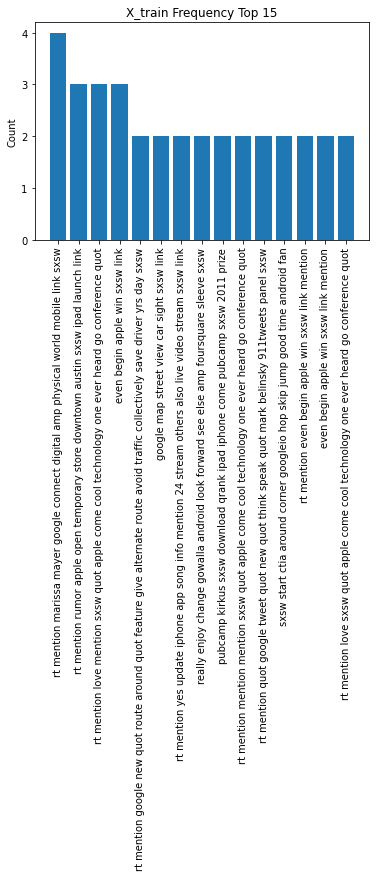

In [120]:
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MaxNLocator
# train_freq_dist = FreqDist(X_train['Tweet_tokens'].explode())
# plot_frequency(train_freq_dist, "X_train Frequency Top 15")

In [121]:
X_train

,tweet_text,Tweet_tokens
3944,"They're giving away iPad 2's, x boxes and book...",give away ipad box book mention sxsw techenvy
7306,Setting up my iPad2 - very swift and upbeat se...,set ipad2 swift upbeat service morning sxsw ap...
2730,Third time the charm?&gt;&gt;&gt; #Google to l...,third time charm gt gt gt google launch new so...
3568,@mention I used to think that and then they st...,mention use think start make great apps offici...
1146,Hopefully the best thing that comes from #SXSW...,hopefully best thing come sxsw fact people fly...
...,...,...
2760,"Dear Apple, could you roll a hot dog cart full...",dear apple could roll hot dog cart full ipad a...
3151,To kick off #SXSWi @mention is giving away an ...,kick sxswi mention give away ipad visit fb pag...
2121,@mention at #cnngrill #sxsw rockin the #iphone...,mention cnngrill sxsw rockin iphone cooler link
8989,It's crazy how much culture is documented in g...,crazy much culture document google doodle sxsw


In [122]:
#secondary split for holdout
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          test_size=0.25, random_state=42)

In [123]:
cvec = CountVectorizer(max_features=100, stop_words=sw, strip_accents='ascii')
X_t_vec = cvec.fit_transform(X_t['tweet_text'])
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cvec.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)
X_t_vec

,also,amp,android,app,apple,apps,around,austin,awesome,begins,...,using,via,video,want,way,win,wins,would,wow,year
7411,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5059,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6746,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7233,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
X_val_vec = cvec.transform(X_val['tweet_text'])
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cvec.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)
X_val_vec

,also,amp,android,app,apple,apps,around,austin,awesome,begins,...,using,via,video,want,way,win,wins,would,wow,year
2932,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5305,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3129,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1778,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1676,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Multinomial Bayes Models

In [125]:
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [135]:
mnb.n_features_

100

In [127]:
#prior probabilities by label
prior_1 = y_t.value_counts()[1]/len(y_t)
prior_0 = y_t.value_counts()[0]/len(y_t)
print(prior_0, prior_1)

0.1568922305764411 0.8431077694235589


In [128]:
mnb.class_log_prior_

array([-1.85219614, -0.17066049])

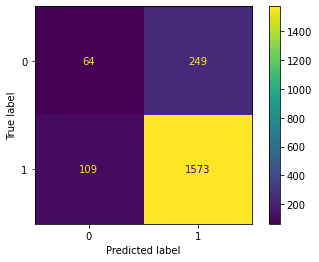

In [133]:
from sklearn.metrics import accuracy_score, precision_score, plot_confusion_matrix
plot_confusion_matrix(mnb, X_t_vec, y_t);

In [134]:
mnb.score(X_t_vec, y_t)

0.8205513784461153

In [144]:
mnb.score(X_val_vec, y_val)

0.7822822822822822

In [149]:
tfidf = TfidfVectorizer(stop_words=sw, lowercase=True, token_pattern=r"([a-zA-Z]+)", strip_accents='ascii')

X_t_tf = tfidf.fit_transform(X_t['tweet_text'])
X_t_tf  = pd.DataFrame.sparse.from_spmatrix(X_t_tf)
X_t_tf.columns = sorted(tfidf.vocabulary_)
X_t_tf.set_index(y_t.index, inplace=True)
X_t_tf

,aTM,aapl,abacus,abandoned,aber,able,abroad,absolutely,abt,abuzz,...,zazzlsxsw,zero,zimride,zing,zite,zms,zombies,zomg,zoom,zzzs
7411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
X_val_tf = tfidf.transform(X_val['tweet_text'])
X_val_tf  = pd.DataFrame.sparse.from_spmatrix(X_val_tf)
X_val_tf.columns = sorted(tfidf.vocabulary_)
X_val_tf.set_index(y_val.index, inplace=True)
X_val_tf

,aTM,aapl,abacus,abandoned,aber,able,abroad,absolutely,abt,abuzz,...,zazzlsxsw,zero,zimride,zing,zite,zms,zombies,zomg,zoom,zzzs
2932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
mnb2 = MultinomialNB()

mnb2.fit(X_t_tf, y_t)

MultinomialNB()

0.8541353383458646


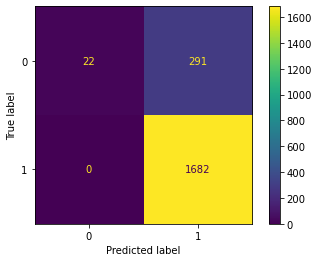

In [152]:
plot_confusion_matrix(mnb2,X_t_tf, y_t);
print(mnb2.score(X_t_tf, y_t))

In [153]:
mnb2.score(X_val_tf, y_val)

0.8258258258258259

### Random Forest Models

In [154]:
rf = RandomForestClassifier()
rf.fit(X_t_tf, y_t)

RandomForestClassifier()

In [155]:
rf.score(X_t_tf, y_t)

1.0

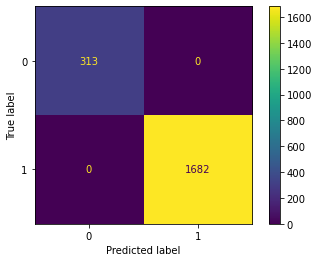

In [156]:
plot_confusion_matrix(rf,X_t_tf, y_t);

In [157]:
rf.score(X_val_tf, y_val)

0.8543543543543544

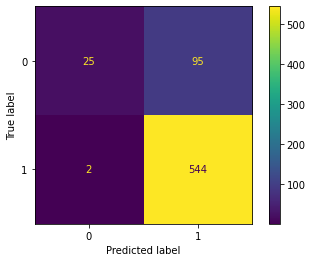

In [159]:
plot_confusion_matrix(rf,X_val_tf, y_val);

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
rf_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5],
    'min_samples_leaf' : [1, 5, 10, 25]
}

rf_gs = GridSearchCV(rf, rf_grid, cv=5)

In [162]:
rf_gs.fit(X_t_tf, y_t)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5],
                         'min_samples_leaf': [1, 5, 10, 25]})

In [163]:
rf_gs.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [164]:
rf_gs.best_score_

0.8431077694235588